In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip
replace data/sample_submission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_data=pd.read_csv('data/train.csv.zip')

In [ ]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
test_data=pd.read_csv('data/test.csv.zip')

In [ ]:
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# def remove_stop_word(text):
#   words = [word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]
#   return " ".join(words)

In [ ]:
import string
def remove_punc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
# import nltk
# from nltk.stem.porter import PorterStemmer

# def stem(text):
#   porter_stemmer = PorterStemmer()
#   words = [porter_stemmer.stem(word) for word in text.split()]
#   return " ".join(words)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
#https://www.kaggle.com/gtskyler/toxic-comments-bert

In [ ]:
# train_data['comment_texxxt'] = train_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text)).map(lambda text: remove_stop_word(text))
# test_data['comment_texxxt'] = test_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text)).map(lambda text: remove_stop_word(text))
train_data['comment_texxxt'] = train_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text))
test_data['comment_texxxt'] = test_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text))

In [ ]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_texxxt
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cannot make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and for the second time of asking when your vi...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you should be ashamed of yourself that is a ho...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm theres no actual article for prost...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and it looks like it was actually you who put ...


In [ ]:
test_data

,id,comment_text,comment_texxxt
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i do not anonymously edit articles at all
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",i totally agree this stuff is nothing but too ...
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw from out field to home plate does it get...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories i see your changes a...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one of the founding nations of the eu germany ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
# train_values_x = train_data['comment_texxt'].values
train_values_x = train_data['comment_texxxt'].values
train_values_y = train_data[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].values

In [ ]:
# Split training, validation set
train_x, val_x, train_y, val_y = train_test_split(train_values_x, train_values_y, test_size=0.2, random_state=30)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(127656,)
(127656, 6)
(31915,)
(31915, 6)


In [ ]:
# Tokenize training data
vocab_len = 100000
tokenizer = Tokenizer(num_words = vocab_len, oov_token='<oov>')
# tokenizer.fit_on_texts(train_data['comment_texxt'])
tokenizer.fit_on_texts(train_data['comment_texxxt'])

In [ ]:
# Encode training data sentences into sequences
train_seq = tokenizer.texts_to_sequences(train_x)

In [ ]:
# Get max training sequence length
maxlen = max([len(x) for x in train_seq])
print(maxlen)

1403


In [ ]:
# Pad the training sequences
train_pad = pad_sequences(train_seq, maxlen = maxlen,
                          padding = 'pre',
                          truncating='pre')

In [ ]:
# print("\nTraining sequences:\n", train_seq)
# print("\nPadded training sequences:\n", train_pad)
print("\nPadded training shape:", train_pad.shape)
print("Training sequences data type:", type(train_seq))
print("Padded Training sequences data type:", type(train_pad))


Padded training shape: (127656, 1403)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [ ]:
val_seq = tokenizer.texts_to_sequences(val_x)
val_pad = pad_sequences(val_seq, maxlen = maxlen,
                        padding = 'pre',
                        truncating='pre')

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

190214

In [ ]:
embed_dim = 300

In [ ]:
!unzip drive/MyDrive/crawl-300d-2M.vec.zip

Archive:  drive/MyDrive/crawl-300d-2M.vec.zip
  inflating: crawl-300d-2M.vec       


In [ ]:
import io
from tqdm.auto import tqdm

print('loading word embeddings...')
embeddings_index = {}
f = io.open('crawl-300d-2M.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...


0it [00:00, ?it/s]

found 1999996 word vectors


In [ ]:
# Prepare embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = vocab_size
fasttext_matrix = np.zeros((nb_words, 300))

for word, i in tokenizer.word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        fasttext_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
        
print('number of null word embeddings: %d' % np.sum(np.sum(fasttext_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 87561


In [ ]:
# !wget --no-check-certificate \http://nlp.stanford.edu/data/glove.6B.zip \ -O /tmp/glove.6B.zip

In [ ]:
# !unzip drive/MyDrive/glove.6B.zip

In [ ]:
import numpy as np
embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
word_index = tokenizer.word_index

In [ ]:
glove_matrix = np.zeros((len(word_index) + 1, embed_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        glove_matrix[i] = embedding_vector

In [ ]:
def plot_learning_curve(history):
  plt.plot(history.history['loss'], label='training')
  plt.plot(history.history['val_loss'], label='validation')
  plt.legend()
  plt.show()

In [ ]:
def CNN_model(embed_dim, kernel_num=32, kernel_sizes=[1], embed_weights=None, drop_out_rate=0.0):
  # Input
  input = tf.keras.Input(shape=(maxlen,))
 
  # Embedding layers
  if embed_weights is not None:
    embedding = tf.keras.layers.Embedding(
          input_dim=vocab_size,
          output_dim=embed_dim, 
          input_length=maxlen,
          # weights=[embed_weights], 
          embeddings_initializer=tf.keras.initializers.Constant(embed_weights),
          trainable=False,
          name='pretrained_embedding'
    )
  else:
    embedding = tf.keras.layers.Embedding(
          input_dim=vocab_size,
          output_dim=embed_dim, 
          input_length=maxlen, 
          trainable=True,
          name='trainable_embedding'
    )

  embed_out = tf.keras.layers.Reshape((maxlen, embed_dim, 1))(embedding(input))

  # Convolutional layers (seperate convs for each word groups)
  conv_list = [tf.keras.layers.Conv2D(
      filters=kernel_num, 
      kernel_size=(k, embed_dim),
      activation='relu',
      padding='valid',
      name=f'conv_group_{k}_word') for k in kernel_sizes]
    
  conv_outs = [conv(embed_out) for conv in conv_list]
 
  # Max pooling layer (one for each convolutional layer)
  max_pool_list = [tf.keras.layers.MaxPool1D(
      pool_size = maxlen,
      padding='same',
      name=f'max_pool_group_{k}_word') for k in kernel_sizes]

  max_pool_outs = []

  for i in range(len(kernel_sizes)):
    max_pool_outs.append(max_pool_list[i](tf.squeeze(conv_outs[i], axis=2)))
 
  # Concatenate layer
  concate = tf.keras.layers.Concatenate(axis=1, name='concate')(max_pool_outs)

  # Flatten layer
  flat_out = tf.keras.layers.Flatten(name='flatten')(concate)

  # Dropout
  drop_out = tf.keras.layers.Dropout(drop_out_rate, name='dropout')(flat_out)
 
  # Output
  output = tf.keras.layers.Dense(6, name='output')(drop_out)
 
  # CNN model
  return tf.keras.Model(inputs=[input], outputs=[output], name='cnn')

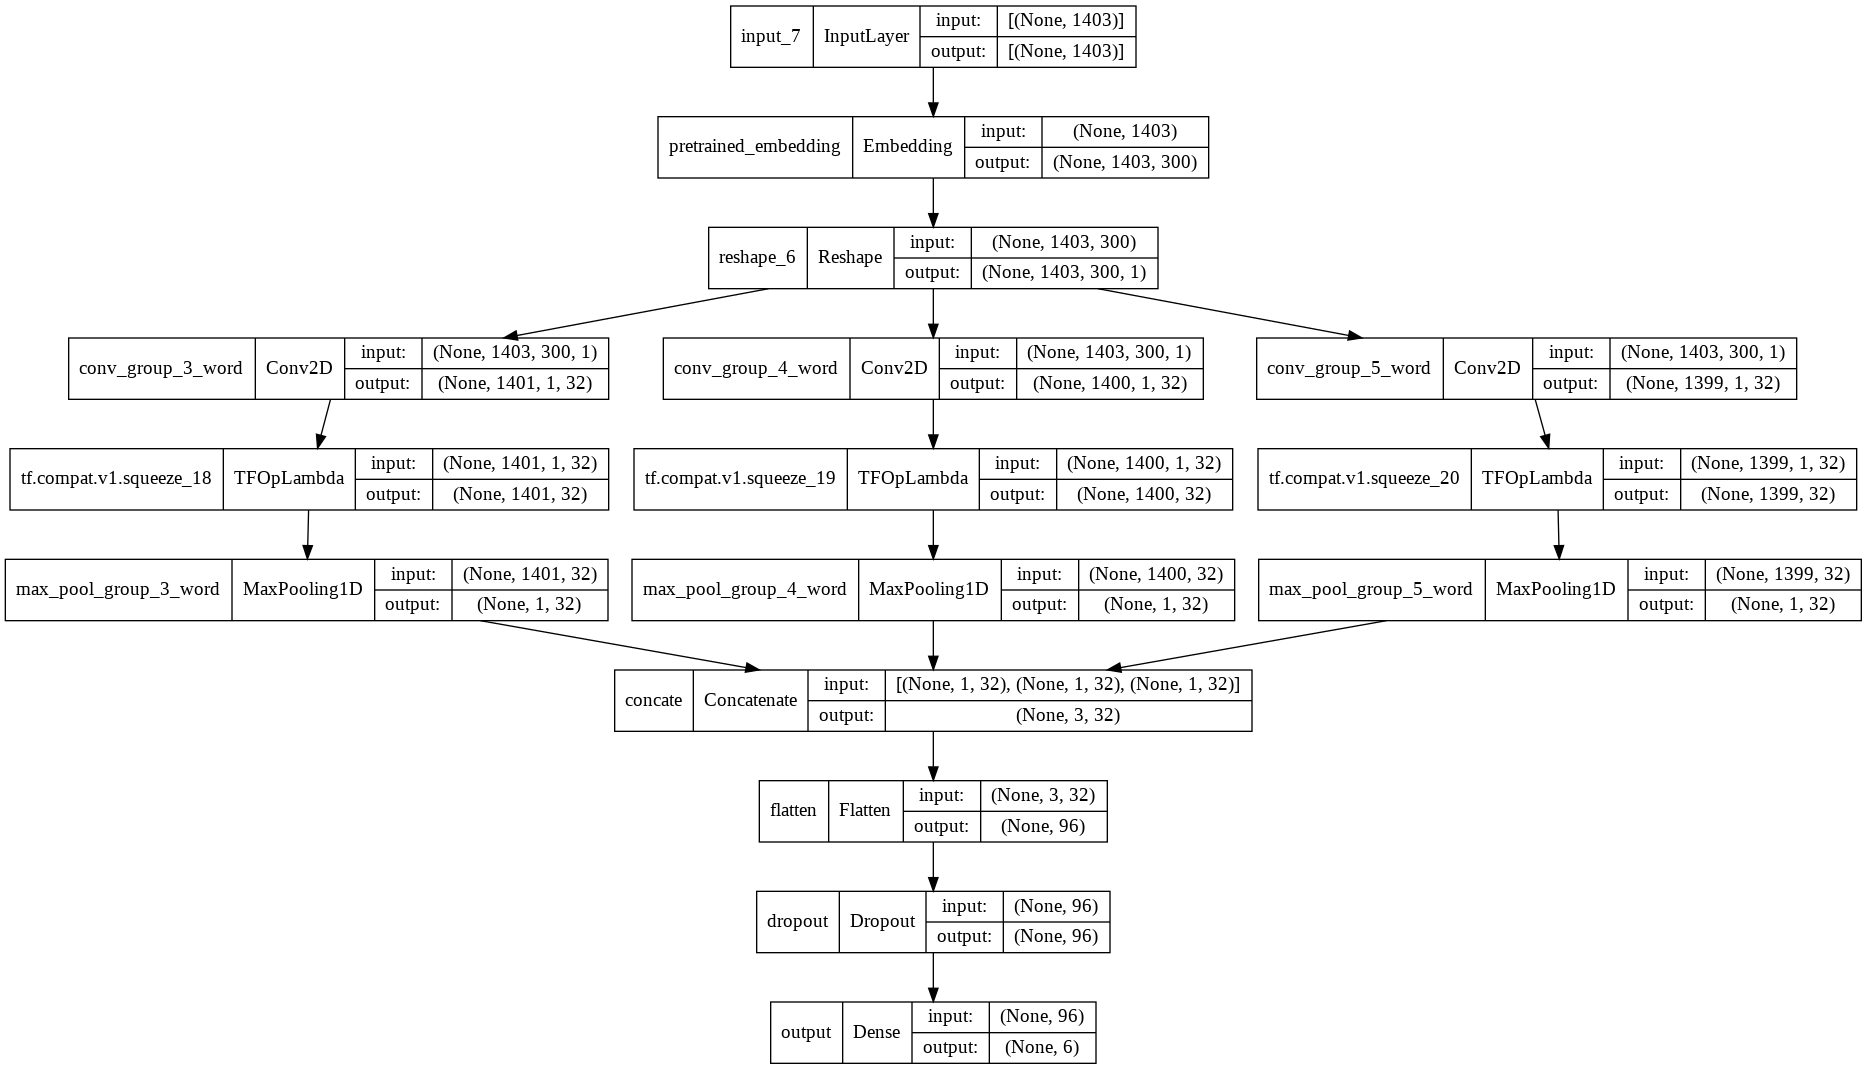

In [ ]:
cnn = CNN_model(embed_dim=embed_dim, embed_weights=glove_matrix, kernel_sizes=[3, 4, 5], drop_out_rate=0.2)
tf.keras.utils.plot_model(cnn, show_shapes=True)

In [ ]:
cnn.summary()

Model: "cnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1403)]       0           []                               
                                                                                                  
 pretrained_embedding (Embeddin  (None, 1403, 300)   57064200    ['input_7[0][0]']                
 g)                                                                                               
                                                                                                  
 reshape_6 (Reshape)            (None, 1403, 300, 1  0           ['pretrained_embedding[0][0]']   
                                )                                                                 
                                                                                                

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=1,
    mode='min',
    verbose=1
)

cnn.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
)

history_cnn = cnn.fit(
    train_pad,
    train_y,
    epochs = 5,
    validation_data=(val_pad, val_y), 
    batch_size = 32,
    callbacks=[early_stopping] 
)

Epoch 1/5
3990/3990 [==============================] - 359s 90ms/step - loss: 0.0657 - val_loss: 0.0542
Epoch 2/5
3990/3990 [==============================] - 357s 89ms/step - loss: 0.0511 - val_loss: 0.0490
Epoch 3/5
3990/3990 [==============================] - 358s 90ms/step - loss: 0.0473 - val_loss: 0.0489
Epoch 4/5
3990/3990 [==============================] - 358s 90ms/step - loss: 0.0441 - val_loss: 0.0497
Epoch 00004: early stopping


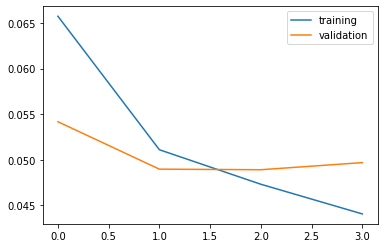

In [ ]:
plot_learning_curve(history_cnn)

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_data.comment_texxxt)
test_pad = pad_sequences(test_seq, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')

In [ ]:
def prepare_submit_file(model, test_pad, batch_size=200):
  predicted = tf.math.sigmoid(model.predict(test_pad, batch_size = batch_size))
  predict = np.hstack((test_data.id[:, np.newaxis], predicted))

  subm = pd.DataFrame(predict, columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
  subm.to_csv('subm.csv', index = False)

  print(subm)

In [ ]:
prepare_submit_file(cnn, test_pad, batch_size=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


                      id        toxic  ...       insult identity_hate
0       00001cee341fdb12     0.999838  ...     0.988103      0.752976
1       0000247867823ef7   0.00424482  ...   0.00196032   0.000578403
2       00013b17ad220c46    0.0123622  ...   0.00803353    0.00338043
3       00017563c3f7919a   0.00273968  ...   0.00140995   0.000250498
4       00017695ad8997eb    0.0348347  ...    0.0104682    0.00171533
...                  ...          ...  ...          ...           ...
153159  fffcd0960ee309b5     0.508009  ...    0.0204929    0.00339026
153160  fffd7a9a6eb32c16    0.0413673  ...    0.0091051     0.0015539
153161  fffda9e8d6fafa9e  0.000264021  ...  0.000198655   8.71405e-05
153162  fffe8f1340a79fc2   0.00460601  ...   0.00157035    0.00848836
153163  ffffce3fb183ee80      0.98798  ...     0.342285     0.0337524

[153164 rows x 7 columns]


In [ ]:
# Hyperparameter tuning
pip install keras-tuner --upgrade
import kerastuner as kt

In [ ]:
def build_cnn_hyper_model(hp):
  # Input
  input = tf.keras.Input(shape=(maxlen,), name='input')
 
  # Embedding layers
  embedding = tf.keras.layers.Embedding(
          input_dim=vocab_size,
          output_dim=embed_dim, 
          input_length=maxlen,
          weights=[fasttext_matrix], 
          trainable=False,
          name='pretrained_embedding'
  )

  embed_out = tf.keras.layers.Reshape((maxlen, embed_dim, 1), name='reshape')(embedding(input))

  # Convolution + Max pooling
  conv_list = []
  max_pool_list = []
  max_pool_outs = []
  # min_height = hp.Int('min_kernel_height', 2, 3)
  kernel_num = hp.Int('kernel_num', 32, 128, step=32)
  conv_num = hp.Int('conv_num', 1, 3)

  for i in range(conv_num):  
    kernel_height = 3 + i

    # Convolutional layers (seperate convs for each word groups)
    conv = tf.keras.layers.Conv2D(
        filters=kernel_num,
        kernel_size=(kernel_height, embed_dim),
        activation='relu',
        padding='valid',
        name=f'conv_group_{kernel_height}'
    )

    conv_list.append(conv)

    # Max pooling layers (one for each conv layer)
    max_pool = tf.keras.layers.MaxPool1D(
        pool_size = maxlen,
        padding='same',
        name=f'max_pooling_group_{kernel_height}')
    
    max_pool_list.append(max_pool)

  conv_outs = [conv(embed_out) for conv in conv_list]

  for i in range(len(conv_outs)):
     max_pool_outs.append(max_pool_list[i](tf.squeeze(conv_outs[i], axis=2)))
 
  # Concatenate layer
  concate = tf.keras.layers.Concatenate(axis=1, name='concate')(max_pool_outs)

  # Flatten layer
  flat_out = tf.keras.layers.Flatten(name='flatten')(concate)

  # Dropout
  drop_out = tf.keras.layers.Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1), name='dropout')(flat_out)
 
  # Output
  output = tf.keras.layers.Dense(6, name='output')(drop_out)
 
  # CNN model
  cnn_model = tf.keras.Model(inputs=[input], outputs=[output], name='cnn')

  # Model compling
  cnn_model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
  )

  return cnn_model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_cnn_hyper_model,
    objective='val_loss',
    max_trials=50,
    directory='tuning',
    overwrite=False,
    project_name='cnn_fasttext'
)

In [ ]:
tuner.search_space_summary()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=1,
    mode='min',
    verbose=1
)

tuner.search(
    train_pad, 
    train_y, 
    epochs=5, 
    validation_data=(val_pad, val_y),
    callbacks=[early_stopping])

In [ ]:
tuner.results_summary()

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.summary()